In [1]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file = 'train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)
file1 = 'train-labels-idx1-ubyte'
arr1 = idx2numpy.convert_from_file(file1)

In [3]:
x_train = arr
x_train = x_train.flatten().reshape(-1,28*28)
x_train = x_train / 255.0
gt_indices = arr1
train_length = len(x_train)
print("Number of training examples: {:d}".format(train_length))

Number of training examples: 60000


In [4]:
'''Dimensions to be used for creating your model'''

batch_size = 64  # batch size
input_dim = 784  # input dimension
hidden_1_dim = 512  # hidden layer 2 dimension
output_dim = 10   # output dimension

'''Other hyperparameters'''
learning_rate = 1e-2

In [5]:
#creating one hot vector representation of output classification
y_train = np.zeros((train_length, output_dim))
# print(y.shape, gt_indices.shape)
for i in range(train_length):
    y_train[i,gt_indices[i]] = 1

# Number of mini-batches (as integer) in one epoch
num_minibatches = np.floor(train_length/batch_size).astype(int) 

In [6]:
print("No of mini-batches {:d} and total training data used in training:\
{}.".format(num_minibatches, num_minibatches*batch_size))

No of mini-batches 937 and total training data used in training:59968.


In [7]:
###############################################################################################
W1 = 0.2*np.random.randn(input_dim, hidden_1_dim)
W2 = 0.2*np.random.randn(hidden_1_dim,output_dim)
###############################################################################################

In [8]:
def relu(a):
    return np.maximum(a,0)

def grad_relu(x):
    return 1. * (x > 0)

In [9]:
# function which computes the softmax where X is vector of scores computed during forward pass
def softmax(z):
  
    return np.exp(z) / np.sum(np.exp(z),axis=1,keepdims=True)
    
    pass


 Epoch: 0, iteration: 0, Loss: 8.0226 
 Epoch: 1, iteration: 937, Loss: 0.1081 
 Epoch: 2, iteration: 1874, Loss: 0.0274 
 Epoch: 3, iteration: 2811, Loss: 0.0187 
 Epoch: 4, iteration: 3748, Loss: 0.0117 
 Epoch: 5, iteration: 4685, Loss: 0.0073 
 Epoch: 6, iteration: 5622, Loss: 0.0064 
 Epoch: 7, iteration: 6559, Loss: 0.0050 
 Epoch: 8, iteration: 7496, Loss: 0.0045 
 Epoch: 9, iteration: 8433, Loss: 0.0025 
 Epoch: 10, iteration: 9370, Loss: 0.0034 
 Epoch: 11, iteration: 10307, Loss: 0.0036 
 Epoch: 12, iteration: 11244, Loss: 0.0036 
 Epoch: 13, iteration: 12181, Loss: 0.0035 
 Epoch: 14, iteration: 13118, Loss: 0.0033 
 Epoch: 15, iteration: 14055, Loss: 0.0032 
 Epoch: 16, iteration: 14992, Loss: 0.0031 
 Epoch: 17, iteration: 15929, Loss: 0.0029 
 Epoch: 18, iteration: 16866, Loss: 0.0029 
 Epoch: 19, iteration: 17803, Loss: 0.0028 
 Epoch: 20, iteration: 18740, Loss: 0.0027 
 Epoch: 21, iteration: 19677, Loss: 0.0027 
 Epoch: 22, iteration: 20614, Loss: 0.0027 
 Epoch: 23, i

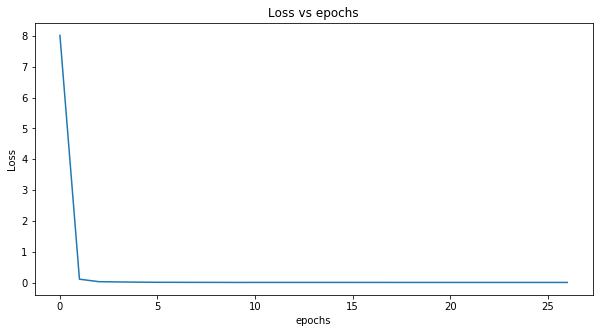

In [10]:
no_of_iterations = 25000
loss_list=[]
i_epoch = 0
for i_iter in range(no_of_iterations):
    
    ''''''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
   # first hidden layer implementation
    a1 =x_batchinput@W1
  
    # implement Relu layer
    h1 =relu(a1)
    #  implement  hidden layer
    a2 = h1@W2
    
    # softmax layer
    softmax_score = softmax(a2) #enusre you have implemented the softmax function defined above

    neg_log_softmax_score = -np.log(softmax_score+0.00000001) # The small number is added to avoid 0 input to log function
    
    # Compute and print loss
    if i_iter%num_minibatches == 0:
        loss = np.mean(np.diag(np.take(neg_log_softmax_score, gt_indices[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size],\
                                       axis=1)))
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i_iter, loss))
        loss_list.append(loss)
        i_epoch += 1
        # Each 10th epoch reduce learning rate by a factor of 10
        if i_epoch%10 == 0:
            learning_rate /= 10.0
     
    
    
    gradsoft = softmax_score-y_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
    # gradient w.r.t W3
    grad_W2 = np.transpose(h1)@gradsoft
   
    # gradient w.r.t h1
    grad_h1 = gradsoft@np.transpose(W2)
    
    # gradient w.r.t a1
    grad_a1 = grad_h1*grad_relu(a1)
    
    # gradient w.r.t W1
    grad_W1 = x_batchinput.T@grad_a1
    
    ################################ Update Weights Block using SGD ####################################
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
    ####################################################################################################
    
#plotting the loss
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.title('Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
file2 = 't10k-images-idx3-ubyte'
arr2 = idx2numpy.convert_from_file(file2)
file3 = 't10k-labels-idx1-ubyte'
arr3 = idx2numpy.convert_from_file(file3)

In [12]:
'''Loading the test data from data/X_test.npy and data/y_test.npy.'''
x_test = arr2
x_test = x_test.flatten().reshape(-1,28*28)
x_test = x_test / 255.0
y_test = arr3

In [13]:
batch_size_test = 100 # Deliberately taken 100 so that it divides the test data size
num_minibatches = len(y_test)/batch_size_test
test_correct = 0

'''Only forward block code and compute softmax_score .'''
for i_iter in range(int(num_minibatches)):
    
    '''Get one minibatch'''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    ######### copy only the forward pass block of your code and pass the x_batchinput to it and compute softmax_score ##########
    a1 =x_batchinput@W1
  
    # implement Relu layer
    h1 =relu(a1)
    #  implement 2 hidden layer
    a2 = h1@W2
   
    # softmax layer
    softmax_score = softmax(a2) #Implemented the softmax function defined above
    
    
    y_batchinput = y_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    y_pred = np.argmax(softmax_score, axis=1)
    num_correct_i_iter = np.sum(y_pred == y_batchinput)
    test_correct += num_correct_i_iter
print ("Test accuracy is {:4.2f} %".format(test_correct/len(y_test)*100))

Test accuracy is 97.87 %
